![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
crime = pd.read_csv('crimes.csv')
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15T00:00:00.000,2020-11-12T00:00:00.000,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22T00:00:00.000,2020-05-12T00:00:00.000,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06T00:00:00.000,2020-06-04T00:00:00.000,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27T00:00:00.000,2020-01-27T00:00:00.000,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [305]:
# we clean the column names by removing the spaces and lower casing the words 
columns= []
for col in crime.columns:
    col = col.lower()
    col= col.replace(' ','_')
    columns.append(col)

In [306]:
columns

['dr_no',
 'date_rptd',
 'date_occ',
 'time_occ',
 'area_name',
 'crm_cd_desc',
 'vict_age',
 'vict_sex',
 'vict_descent',
 'weapon_desc',
 'status_desc',
 'location']

In [307]:
crime.columns = columns

In [308]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
0,221412410,2022-06-15T00:00:00.000,2020-11-12T00:00:00.000,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22T00:00:00.000,2020-05-12T00:00:00.000,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06T00:00:00.000,2020-06-04T00:00:00.000,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27T00:00:00.000,2020-01-27T00:00:00.000,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [309]:
# checking the data dtypes
crime.dtypes

dr_no            int64
date_rptd       object
date_occ        object
time_occ         int64
area_name       object
crm_cd_desc     object
vict_age         int64
vict_sex        object
vict_descent    object
weapon_desc     object
status_desc     object
location        object
dtype: object

### Which hour has the highest frequency of crimes?

In [310]:
# assigning the date to its appropriate type 
crime['date_occ']= pd.to_datetime(crime['date_occ'])

In [311]:
# We ensure that the hour values are zero-padded to four digits using
crime['time_occ'] = crime['time_occ'].astype(str).str.zfill(4)

In [312]:
#We specify the format of the hour values using the format parameter, which is set to '%H%M'
#to indicate that the hour values are in 24-hour format without colons.
crime['time_occ'] = pd.to_datetime(crime['time_occ'], format='%H%M')

In [314]:
crime['hour_occ'] = crime['time_occ'].dt.hour

In [315]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour_occ
0,221412410,2022-06-15T00:00:00.000,2020-11-12,1900-01-01 17:00:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22T00:00:00.000,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06T00:00:00.000,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18T00:00:00.000,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27T00:00:00.000,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6


In [316]:
crime['time_occ'].unique()

<DatetimeArray>
['1900-01-01 17:00:00', '1900-01-01 11:10:00', '1900-01-01 16:20:00',
 '1900-01-01 12:00:00', '1900-01-01 06:35:00', '1900-01-01 09:00:00',
 '1900-01-01 10:00:00', '1900-01-01 13:35:00', '1900-01-01 00:01:00',
 '1900-01-01 01:55:00',
 ...
 '1900-01-01 09:52:00', '1900-01-01 10:42:00', '1900-01-01 14:04:00',
 '1900-01-01 14:01:00', '1900-01-01 10:14:00', '1900-01-01 19:13:00',
 '1900-01-01 22:31:00', '1900-01-01 03:23:00', '1900-01-01 21:11:00',
 '1900-01-01 00:37:00']
Length: 828, dtype: datetime64[ns]

In [317]:
crime_hour = crime.groupby('hour_occ').agg(num_of_crimes = ('hour_occ','count')).reset_index()

In [318]:
crime_hour

,hour_occ,num_of_crimes
0,0,536
1,1,236
2,2,162
3,3,151
4,4,155
5,5,148
6,6,232
7,7,206
8,8,420
9,9,327


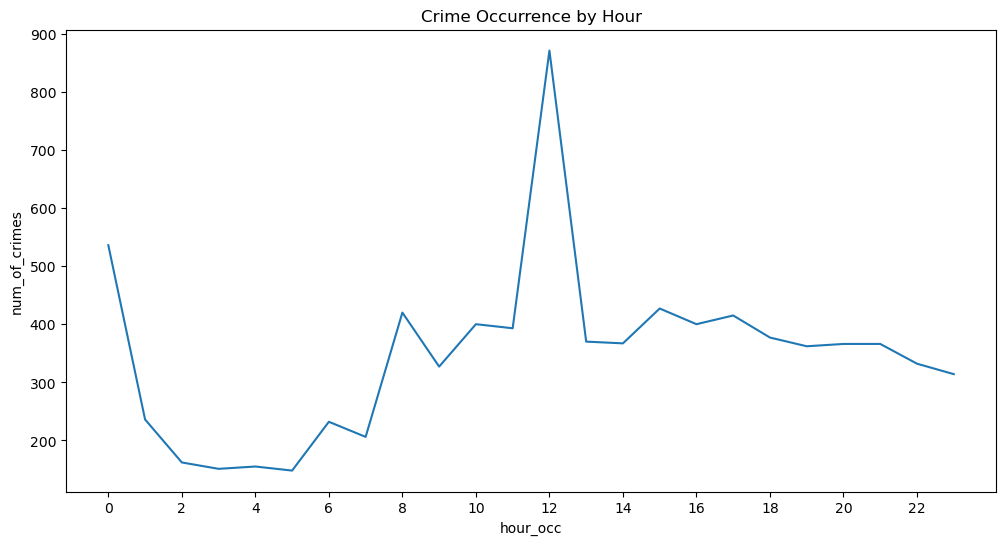

In [378]:
plt.figure(figsize = (12,6))
sns.lineplot(data = crime_hour, x = 'hour_occ', y = 'num_of_crimes')
plt.title( "Crime Occurrence by Hour")
plt.xticks(list(range(0,23,2)))
plt.show()

In [379]:
top_crime_hour = crime_hour[crime_hour['num_of_crimes'] ==\
                                                 max(crime_hour['num_of_crimes'])]['hour_occ'].values[0]
top_crime_hour

12

###### We find that 12 pm has the most crime occurrence

#### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [321]:
peak_night_crime = crime[(crime['hour_occ'] >= 22) | (crime['hour_occ'] <= 4)]

In [381]:
peak_night_crime_location= peak_night_crime.groupby('area_name').agg(num_of_crimes = ('area_name','count'))\
                                                                .reset_index()
peak_night_crime_location.sort_values(by = 'num_of_crimes', ascending = False)

,area_name,num_of_crimes
0,77th Street,143
1,Central,132
6,Hollywood,108
8,N Hollywood,105
11,Olympic,100
9,Newton,96
17,Van Nuys,91
14,Southeast,91
12,Pacific,90
18,West LA,90


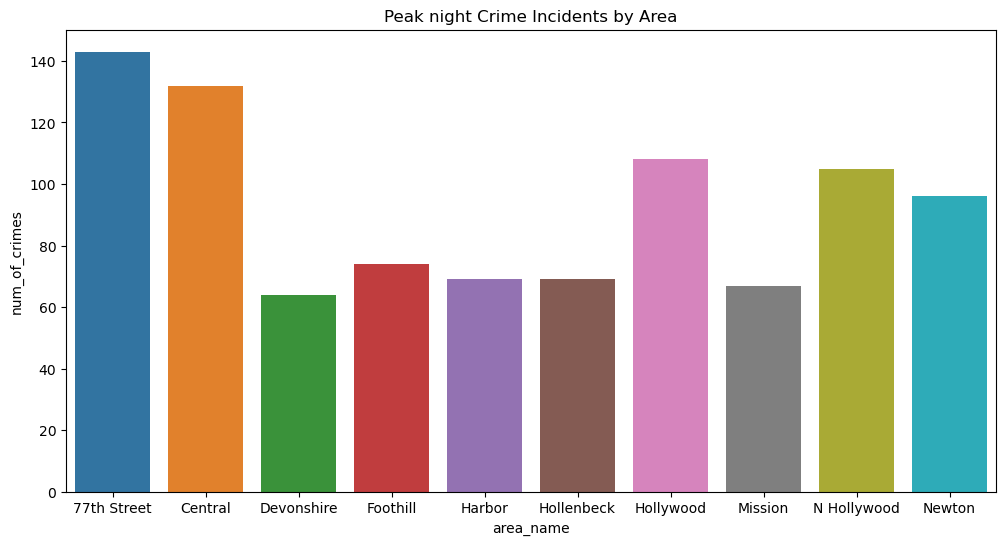

In [382]:
plt.figure(figsize = (12,6))
sns.barplot(data = peak_night_crime_location[:10], x = 'area_name', y = 'num_of_crimes')
plt.title("Peak night Crime Incidents by Area")
plt.show()

###### we find that 77th Street has the most incidents 

### Identify the number of crimes committed against victims of different age groups

In [324]:
crime['hour_occ'].unique()

array([17, 11, 16, 12,  6,  9, 10, 13,  0,  1, 21,  7, 15,  5, 18, 19, 23,
       14,  8,  2, 20, 22,  4,  3])

In [325]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour_occ
0,221412410,2022-06-15T00:00:00.000,2020-11-12,1900-01-01 17:00:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22T00:00:00.000,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06T00:00:00.000,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18T00:00:00.000,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27T00:00:00.000,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6


In [334]:
age_bins = [0,18,26,35,45,55,65,np.inf]

In [335]:
age_label = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [336]:
crime['vict_age_interval'] = pd.cut(crime['vict_age'], bins = age_bins, labels = age_label, right = False)

In [337]:
crime['vict_age_interval']

0        0-17
1       26-34
2       55-64
3       26-34
4       35-44
        ...  
8328    35-44
8329    45-54
8330      65+
8331    26-34
8332     0-17
Name: vict_age_interval, Length: 8333, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65+']

Text(0, 0.5, 'Number of crimes')

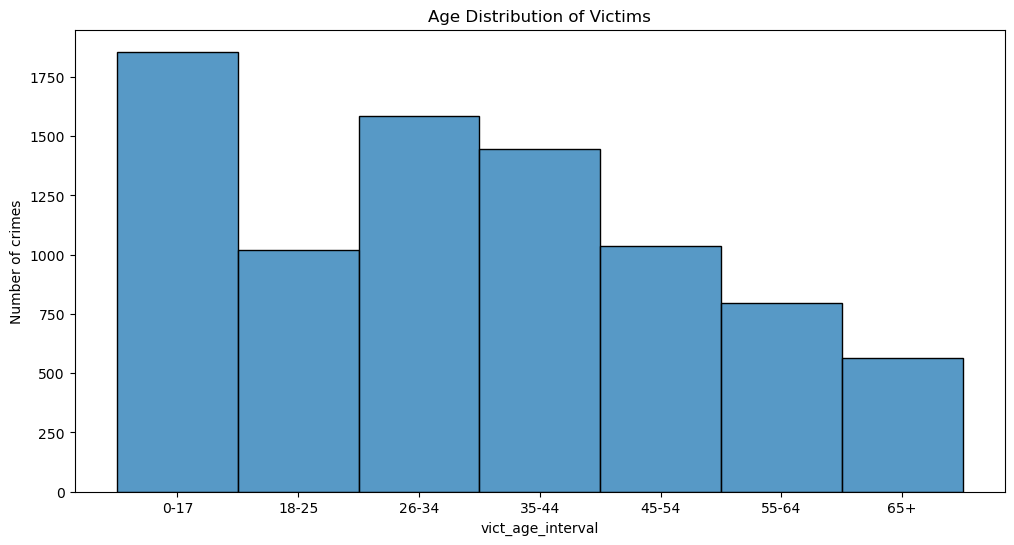

In [266]:
plt.figure(figsize = (12,6))
sns.histplot(crime['vict_age_interval'])
plt.title("Age Distribution of Victims")
plt.ylabel('Number of crimes')

###### We find that crimes are committed against people who are younger than 18 

### What is the gender distribution of crime victims?

In [267]:
crime.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area_name',
       'crm_cd_desc', 'vict_age', 'vict_sex', 'vict_descent', 'weapon_desc',
       'status_desc', 'location', 'hour_occ', 'vict_age_interval'],
      dtype='object')

In [268]:
crime.isnull().sum()

dr_no                   0
date_rptd               0
date_occ                0
time_occ                0
area_name               0
crm_cd_desc             0
vict_age                0
vict_sex              908
vict_descent          907
weapon_desc          6034
status_desc             0
location                0
hour_occ                0
vict_age_interval      31
dtype: int64

In [269]:
crime.shape

(8333, 14)

In [270]:
crime.dtypes

dr_no                         int64
date_rptd                    object
date_occ             datetime64[ns]
time_occ             datetime64[ns]
area_name                    object
crm_cd_desc                  object
vict_age                      int64
vict_sex                     object
vict_descent                 object
weapon_desc                  object
status_desc                  object
location                     object
hour_occ                      int32
vict_age_interval          category
dtype: object

In [271]:
victim_sex = crime['vict_sex'].value_counts().reset_index()
victim_sex

,vict_sex,count
0,M,3548
1,F,3300
2,X,575
3,H,2


In [272]:
victim_sex = victim_sex[victim_sex['vict_sex'] != 'H']

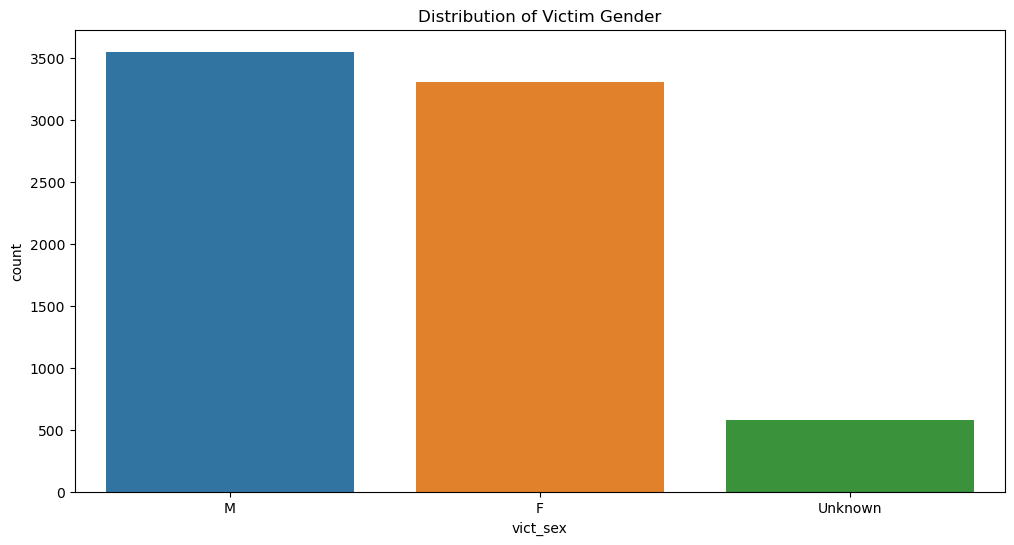

In [273]:
plt.figure(figsize = (12,6))
sns.barplot(data = victim_sex , x = 'vict_sex', y = 'count')
plt.xticks([0, 1, 2], ['M', 'F', 'Unknown'])
plt.title("Distribution of Victim Gender")
plt.show()

###### we find that most of the victims are males 

### What is the most crime committed ?

In [274]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour_occ,vict_age_interval
0,221412410,2022-06-15T00:00:00.000,2020-11-12,1900-01-01 17:00:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17,0-17
1,220314085,2022-07-22T00:00:00.000,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
2,222013040,2022-08-06T00:00:00.000,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
3,220614831,2022-08-18T00:00:00.000,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
4,231207725,2023-02-27T00:00:00.000,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44


In [285]:
top_10_crimes = crime['crm_cd_desc'].value_counts()[:10].reset_index()
top_10_crimes

,crm_cd_desc,count
0,THEFT OF IDENTITY,1782
1,VEHICLE - STOLEN,718
2,BATTERY - SIMPLE ASSAULT,550
3,BURGLARY,405
4,"""VANDALISM - FELONY ($400 & OVER, ALL CHURCH V...",400
5,BURGLARY FROM VEHICLE,385
6,INTIMATE PARTNER - SIMPLE ASSAULT,354
7,"""THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,L...",351
8,THEFT PLAIN - PETTY ($950 & UNDER),347
9,"""ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT""",337


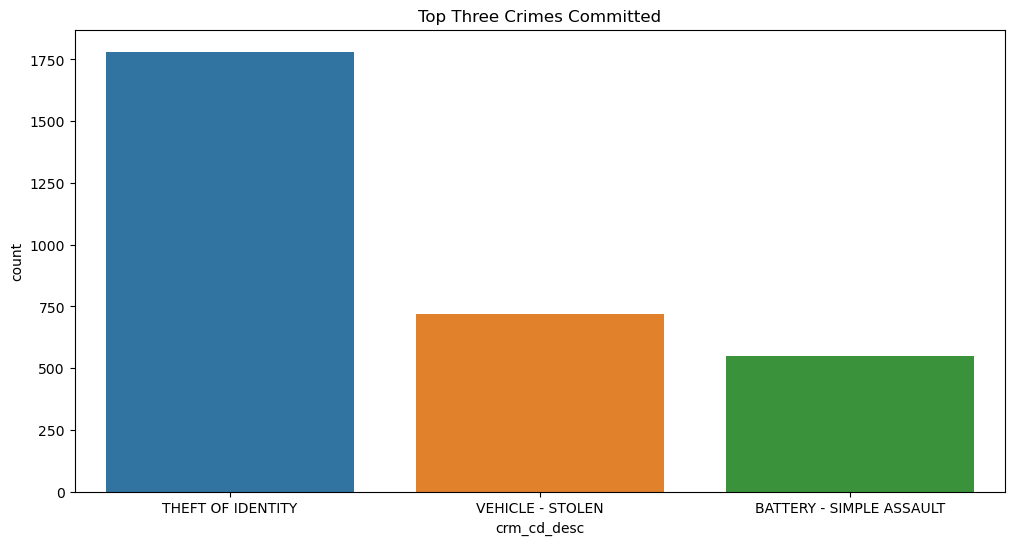

In [293]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_10_crimes[:3] , x = 'crm_cd_desc', y = 'count')
plt.title('Top Three Crimes Committed')
plt.show()

###### Theft of identity is the most crime being committed by theives

### What year has the highest crime rate?

In [390]:
crime['year_occ'] = crime['date_occ'].dt.year
crime['month_occ'] = crime['date_occ'].dt.month

In [296]:
year_of_crimes = crime['year_occ'].value_counts().reset_index()
year_of_crimes

,year_occ,count
0,2022,6214
1,2021,1362
2,2020,757


In [392]:
crime['year_occ'].value_counts(normalize = True).reset_index()

,year_occ,proportion
0,2022,0.745710
1,2021,0.163447
2,2020,0.090844


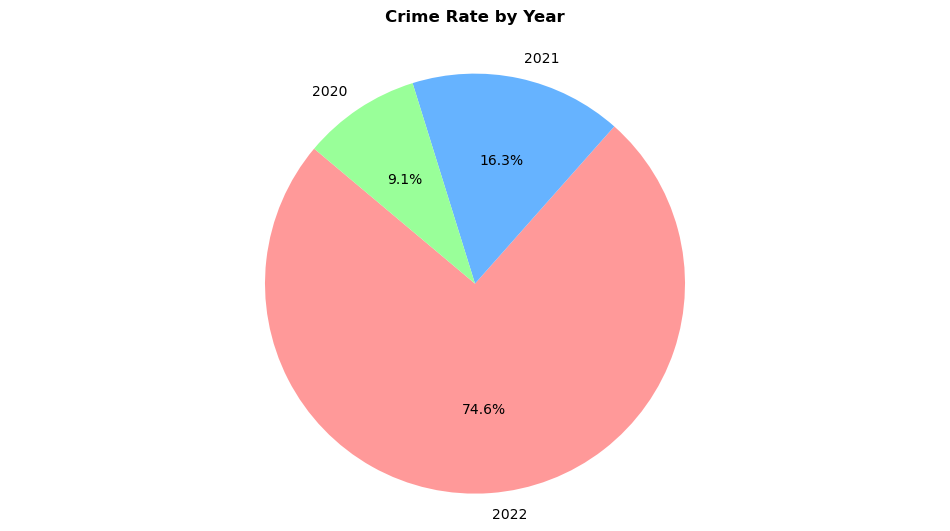

In [407]:
plt.figure(figsize = (12,6))
color = ['#ff9999','#66b3ff','#99ff99']
plt.pie(year_of_crimes['count'], labels = year_of_crimes['year_occ'] , autopct='%1.1f%%', startangle=140,\
       colors= color)
plt.axis('equal')
plt.title('Crime Rate by Year', y = 1.05, fontweight = 'bold')
plt.show()

###### 2022 has the highest crime rate

### What is the race that has the most victims ?

In [300]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour_occ,vict_age_interval,year_occ,month_occ
0,221412410,2022-06-15T00:00:00.000,2020-11-12,1900-01-01 17:00:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17,0-17,2020,11
1,220314085,2022-07-22T00:00:00.000,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34,2020,5
2,222013040,2022-08-06T00:00:00.000,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64,2020,6
3,220614831,2022-08-18T00:00:00.000,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34,2020,8
4,231207725,2023-02-27T00:00:00.000,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44,2020,1


In [303]:
crime.isnull().sum()

dr_no                   0
date_rptd               0
date_occ                0
time_occ                0
area_name               0
crm_cd_desc             0
vict_age                0
vict_sex              908
vict_descent          907
weapon_desc          6034
status_desc             0
location                0
hour_occ                0
vict_age_interval      31
year_occ                0
month_occ               0
dtype: int64

In [347]:
crime['vict_descent'].value_counts()

vict_descent
H    2529
W    1750
B    1347
O     753
X     629
A     212
K      61
C      50
F      43
J      14
V      11
P      10
I      10
U       4
Z       2
S       1
Name: count, dtype: int64

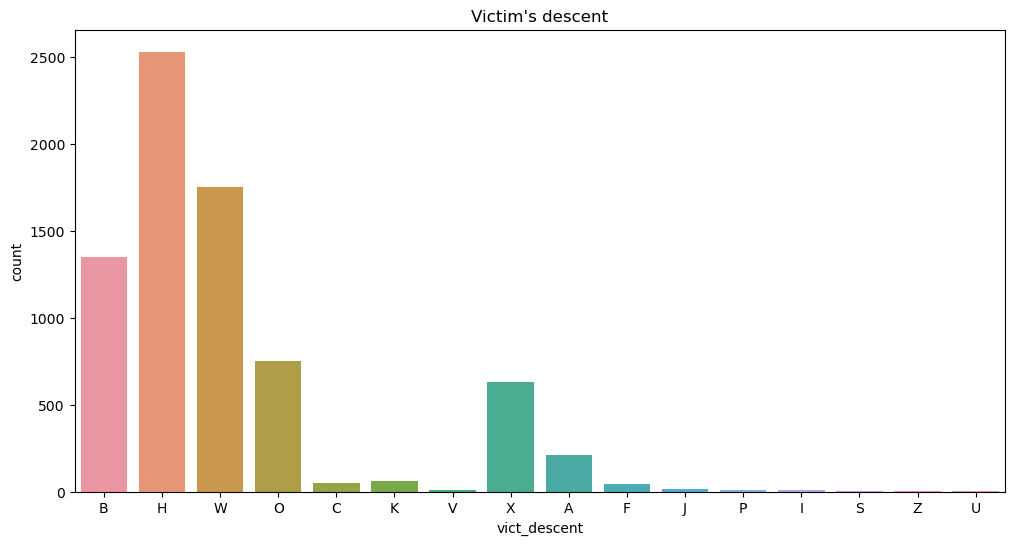

In [350]:
plt.figure(figsize = (12,6))
sns.countplot(data = crime, x= 'vict_descent')
plt.title("Victim's descent")
plt.show()

###### We find that most of the victims are Hispanic/Latin/Mexican  (H)

### What is the most used weapon by criminals ?

In [406]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour_occ,vict_age_interval,Age Bracket,year_occ,month_occ
0,221412410,2022-06-15T00:00:00.000,2020-11-12,1900-01-01 17:00:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17,0-17,NaN,2020,11
1,220314085,2022-07-22T00:00:00.000,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34,26-34,2020,5
2,222013040,2022-08-06T00:00:00.000,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64,55-64,2020,6
3,220614831,2022-08-18T00:00:00.000,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34,26-34,2020,8
4,231207725,2023-02-27T00:00:00.000,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44,35-44,2020,1


In [383]:
# notice that we have more than half of our weapon_desc missing and this only shows nearly a quarter 
top_weapons_known = crime['weapon_desc'].value_counts()[:10].reset_index()
top_weapons_known

,weapon_desc,count
0,"""STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)""",1276
1,UNKNOWN WEAPON/OTHER WEAPON,240
2,VERBAL THREAT,171
3,HAND GUN,127
4,OTHER KNIFE,56
5,KNIFE WITH BLADE 6INCHES OR LESS,47
6,SEMI-AUTOMATIC PISTOL,44
7,UNKNOWN FIREARM,40
8,ROCK/THROWN OBJECT,24
9,VEHICLE,23


In [370]:
top_weapons_known['weapon_desc'] = top_weapons_known['weapon_desc'].str.split('(', expand = True)[0]

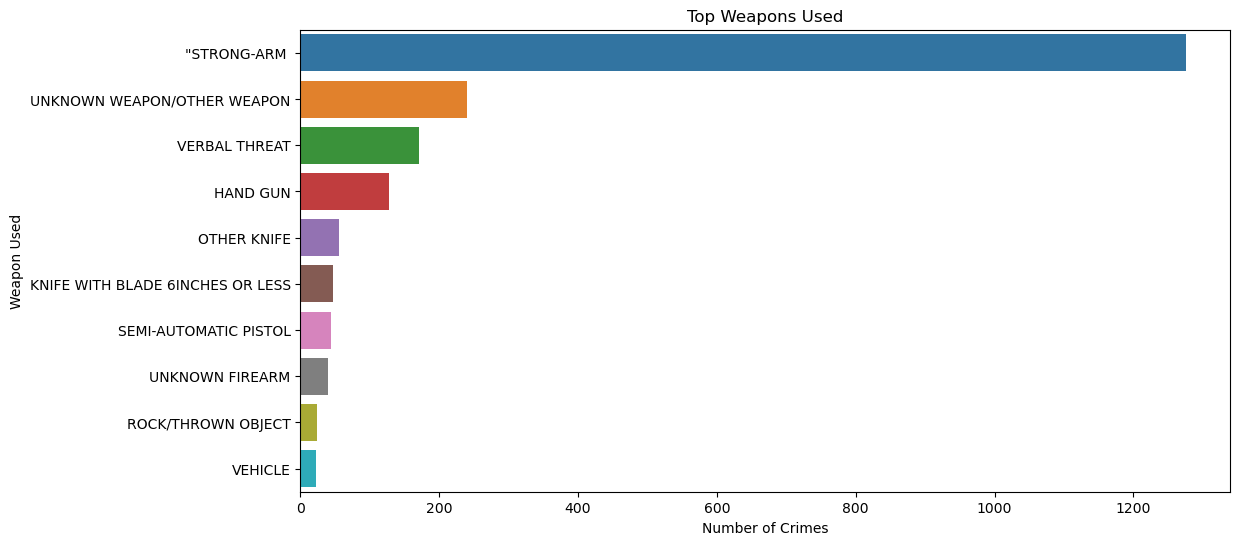

In [373]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_weapons_known, y = 'weapon_desc', x = 'count')
plt.xlabel('Number of Crimes')
plt.ylabel('Weapon Used')
plt.title('Top Weapons Used')
plt.show()

###### We find that "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)" is the most used to commit crimes 